# What is the minimum fall height to break the sound barrier in a non-uniform atmosphere?

## Learning Objectives

After completing this exercise set, the student will be able to:
- Implement a model for air resistance with a varying air density
- Compute the movement of a falling object using the Euler-Cromer method
- Solve a problem using a root-finding algoritm known as the bisection method
- Evaluate the resonability of the model using the graphs of motion

## Introduction: Breaking the sound barrier

Sound moves through the air with a velocity of $343m/s$. When something moves through the air at a higher velocity than sound, it creates a loud shockwave called a <a href="https://en.wikipedia.org/wiki/Sonic_boom">sonic boom</a>. Sonic booms are often created by flying bullets, figher jets, and even bullwhips. What would it take for a human to move fast enough to produce a sonic boom? Is is possible to reach such a high velocity simply by falling through the air?

The anwser is yes! It has been acheived on a couple of occasions by people who jumped from extreme heights. Notable mentions include <a href="https://newatlas.com/record-setting-manned-balloon-flight-skydive-red-bull-baumgartner/24553/">Felix Baumgartner</a> who fell from 39045 meters in 2012, becoming the first person to break the sound barrier during a fall, and <a href="https://www.nytimes.com/2014/10/25/science/alan-eustace-jumps-from-stratosphere-breaking-felix-baumgartners-world-record.html">Alan Eustace</a> who broke Felix's record high jump in 2014 with a fall from 41419 meters.

The question then becomes: What is the minimum fall height necessary to break the sound barrier?

## I. Modeling the Forces

To calculate the fall you will first need to model the different forces acting on the skydiver. When you have the forces and initial conditions of the fall, you can calculate the movement during the entire fall.

### A. Gravity - The gas pedal

The gravitational force between two objects is given by $F = -\frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^-11\frac{Nm^2}{kg^2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other. Furthermore, Newtons second law gives us that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = -\frac{GMm}{r^2m} = -\frac{GM}{r^2}
\end{align*}
$$

This means that the gravitational acceleration at any given time is dependant only on the mass of the object pulling on you, and your distance to it.

Let's start off by importing the necessary libraries.

In [2]:
import numpy as np #Numpy is used for storing numbers and doing calculations effectively
import matplotlib.pyplot as plt #matplotlib is used for plotting

**Exercise 1:**

Write the function **gravAccel(h)** that takes the height above the ground as a paramater, and returns the resultant gravitational **acceleration**. Make sure to take the Earth's radius and the direction of the force into account.

In [3]:
G = 6.674E-11 #Gravitational constant
M = 5.972E24 #Mass of the Earth
R_Earth = 6.371E6 #Radius of the Earth

def gravAccel(h):
    return -G*M/(R_Earth + h)**2

### B. Air resistance - The brakes

Air resistance (often called drag) is the force which the air exerts on an object moving through it, acting in the direction opposite of the relative motion. For the purpose of this exercise set, we will be using the drag equation to calculate air resistance. The drag equation works well at relatively high velocities, which is what we will be looking at.

The drag equation is given by $F_D = \frac{1}{2} \rho v^2 C_D A$ where $\rho$ is the air density, $v$ is the velocity, $C_D$ is the drag coefficient, and $A$ is the cross sectional area. For a skydiver, a drag coefficient $C_D = 0.3$ and a cross sectional area $A = 1m^2$ are <a href="https://www.longdom.org/open-access/buoyancy-explains-terminal-velocity-in-skydiving-2168-9792-1000189.pdf">good enough estimates</a> for rough calculations.

**Exercise 2:**

Write the function **drag(v, rho)** that takes velocity and air density as parameters and returns the **force due to drag**. Make sure that the force acts in the direction opposite of the velocity.

In [4]:
def drag(v, rho):
    return -0.5 * rho * v * abs(v) * 0.3 * 1

**Exercise 3:**

**a)** Let's assume that the atmosphere had a uniform desity of $1.225kg/m^3$ (the average density of air at sea level) all the way up. Using a gravitational acceleration of $9.81m/s^2$, a mass of $80kg$ and drag with an air density of $1.225kg/m^3$, set gravity and drag to be equal and find the resultant velocity. *(you can do this on paper with a calculator)*

You result from **a)** is the terminal velocity, the velocity where drag and gravity cancel eachother out. When you reach this velocity, acceleration becomes zero and velocity becomes constant.

**b)** Given your result in **a)**, would you be able to break the sound barrier by falling through an atmophere with a constant air density of $1.225kg/m^3$? Justify your anwser.

### C. The varying density of the atmosphere

To make our model more realistic and interesting, we can introduce a varying air density.

Density is a measure of mass per unit volume. At sea level, air has a density of $1.225 kg/m^3$. This means that a cubic metre of air at sea level has a mass of $1.225kg$. As altitude increases however, the air density will decrease. This lower air density makes it much easier to reach the speed needed to break the sound barrier.

Density, pressure, temperature and height are connected in complicated ways in the atmosphere. Moreover, these properties change all the time depending on location, weather effects, etc. Nevertheless, these properties are very important and useful to understand and pin down. We will be using a simplified model of the Earth's atmosphere offered by the <a href="https://www.grc.nasa.gov/WWW/k-12/airplane/atmosmet.html">nasa website</a> will be sufficient for the purposes of this exercise set.

From the model on the website, a function for the air density given height can be written:

In [5]:
def airDensity(h):
    if h > 25000:
        T = -131.21 + 0.00299 * h
        p = 2.488 * ((T + 273.1) / 216.6)**(-11.388)
    elif 11000 < h <= 25000:
        T = -56.46
        p = 22.65 * np.exp(1.73 - 0.000157 * h)
    else:
        h = max(0, h) # Negative heights make no sense in this model, keep that in mind when analyzing results
        T = 15.04 - 0.00649 * h
        p = 101.29 * ((T + 273.1) / 288.08)**(5.256)
    return(p / (0.2869 * (T + 273.1))) #The air density

We can plot the density of the atmosphere up to a height of 50000 meters like this:

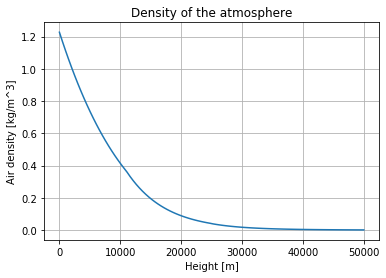

In [14]:
x = np.linspace(0, 50000, 100)
y = [airDensity(i) for i in x]
plt.plot(x,y)
plt.xlabel("Height [m]")
plt.ylabel("Air density [kg/m^3]")
plt.title("Density of the atmosphere")
plt.grid()
plt.show()

**Exercise 4:**

**a)** Use the **airDensity** function to find the air density at 39045 meters. Find the terminal velocity with this air density and a gravitational acceleration of $9.81m/s^2$. Would you be able to break the sound barrier by falling through air with this density? Explain your anwser.

**b)** What would the anwser to **4 a)** be with the air density at 1000 meters?

**Exercise 5:**

Write the function **acceleration(h, v)** that takes the height above the ground and velocity as parameters, and returns the acceleration from gravity and drag. Use the **gravAccel**, **drag** and **airDensity** functions you have defined previously. Make sure to use the acceleration from drag, and not the force. You can set the mass of the skydiver equal to $80kg$.

In [7]:
m = 80
def acceleration(h, v):
    return gravAccel(h) + drag(v, airDensity(h))/m

## II. Calculating the fall through a non-uniform atmosphere

So far you have defined a function for one's acceleration when falling through a non-uniform atmosphere. Furthermore, if you assume that the fall starts off from a given height with no velocity, you also have the initial conditions of the fall. Using these two things, the acceleration function and the initial conditions, you can simulate the fall.

Later, you are going to find the starting height which is necessary to reach high enough speeds to break the sound barrier. Before that though, you will calculate a single fall to see how the calculations work.

### A. Initializing variables and arrays

The simulation method that will be used in this exercise set is the Euler-Cromer method. Like many most numerical methods for simulating motion, it uses the fact that although velocity and acceleration might be changing constantly, if you look at them over a very tiny time step they are essentially constant. Using this principle, you can calculate a long series of linear motions with constant velocity, acheiving surprisingly accurate results.

To implement the method, you will need to know how long to run the simulation, and how short each time step should be. 5000 time steps of 0.05 seconds will work well here, although this resolution will be insufficient for more detailed simulations. To make the code more efficient, we will create some arrays to store our values. Arrays are similar to lists, however size cannot be changed and they are in many cases more computationally efficient.

In [8]:
#These values gives us a good look at a fall from 0 to 100km
n = 5000  #The number of steps in the Euler-Cromer calculation
dt = 0.05 #The size of each time-step in the Euler-Cromer calculation

pos = np.zeros(n) #Height in meters. The array is length n
vel = np.zeros(n) #Velocity in m/s. 
acc = np.zeros(n) #Acceleration in m/s^2

time = np.linspace(0, n*dt, n) #this creates an array of time values, of length n, where each value is n*dt

pos[0] = 41419 #These values were already 0, but feel free to change them and see what happens

### The Euler-Cromer loop

**EXERCISE 6:**

Do the Euler-Cromer calculation of a fall through a non-uniform atmosphere with the initial conditions from above, and an acceleration given by the **acceleration** function. (The current position during the loop will in this case be pos[i])

Here is a template for how the Euler-Cromer method can look when storing values in arrays:

    for i in range(n-1):
        acc[i] = function(arguments)
        vel[i+1] = vel[i] + acc[i] *dt
        pos[i+1] = pos[i] + vel[i+1] *dt
    
    #The last value of this array needs to be calculated seperately
    acc[n-1] = function(arguments)

In [9]:
for i in range(n-1):
    acc[i] = acceleration(pos[i], vel[i])
    vel[i+1] = vel[i] + acc[i]*dt
    pos[i+1] = pos[i] + vel[i+1]*dt
    
#The last values of these arrays need to be calculated seperately
acc[n-1] = acceleration(pos[n-1], vel[n-1])

### Plotting the results

Plotting often involves a lot of functions to fill in all of the necessary information, though a simple "plot(time, pos)" can often be sufficient.

Here is an example of how code to plot these results can look. Hopefully the previous calculations made these plots look reasonable

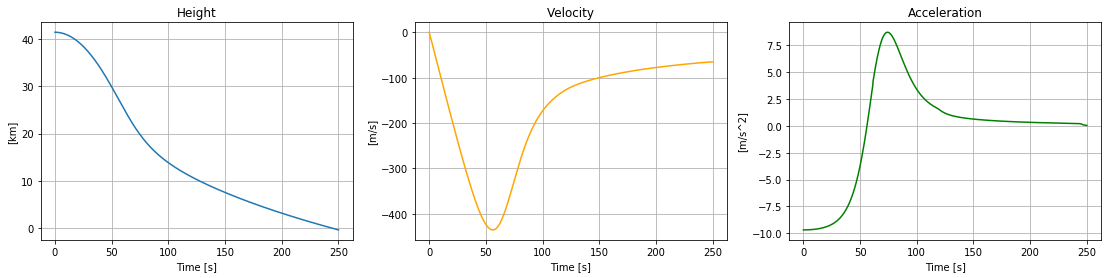

In [10]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos/1000)
plt.xlabel("Time [s]")
plt.ylabel("[km]")
plt.title("Height")
plt.grid()

plt.subplot(132)
plt.plot(time, vel, color="orange")
plt.xlabel("Time [s]")
plt.ylabel("[m/s]")
plt.title("Velocity")
plt.grid()

plt.subplot(133)
plt.plot(time, acc, color="green")
plt.xlabel("Time [s]")
plt.ylabel("[m/s^2]")
plt.title("Acceleration")
plt.grid()

plt.show()

**Exercise 7:**

**a)** If all went well, your acceleration graph should have a somewhat strange shape. Justify this shape using the formula for air resistance. In particular, try to explain the value of the initial acceleration, the acceleration with the largest positive value and the acceleraton near the end. 

**b)** What effect would increasing the weight of the skydiver have on your results?

**c)** What would change about the shape of the acceleration graph if the air density was constant?

**Exercise 8:**

Did the skydiver break the speed barrier (343m/s) during the fall? If so, do you think he or she could have done so with a lower initial height?

## III. The Bisection Method - Finding the height necessary to break the sound barrier

We know that it's possible to break the sound barrier by falling from high enough up in the atmosphere. But what is the minimum necessary height?

Your next task is to find the lowest input height h necessary to give you a top speed of 343m/s. To solve this kind of problem, you can use the **bisection method**. The bisection method is a search algorithm that finds when a given function returns a desired value, within a certain tolerance. It is significantly more computationally efficient than a brute force method (i.e., testing every value until you find the one you want). 

To implement the bisection method, you start by defining your search space. That is, you start by defining the upper and lower bounds of the range of values you will be searching over—call them the **ceiling** and the **floor**. In practice, it's helpful to choose values that are much higher and lower than your expected values, since some extra padding either way will not significantly affect the speed of the search.

With these boundaries specified, the algorithm proceeds as follows: first, you evaluate your function using a value halfway between the **floor** and **ceiling** (call this the **middle**). If your function returns results that are too low, you know that the actual value will be above the middle, so you set the **floor's** value equal to the **middle** (raise the floor). If the returned value is too high, you know the actual value you are looking for will be below the middle, and you set the **ceiling** equal to the **middle** (lower the ceiling). You then repeat this this process with the new **floor** and **ceiling**, until the values of the **floor** and **ceiling** are very close together. Then, your desired value will be the value between them.

You can see an illustration of how this method works in the attached figure.

<img src="Bis4.png" alt="Drawing" style="width: 80%;"/>

*An illustration of four iterations of the bisection method. For implementation in other contexts, please refer to a more <a href="https://en.wikipedia.org/wiki/Bisection_method">general desription</a> of the method.*

In the previous section, you wrote a script to calculate the motion of an object falling through the atmosphere. Your next task will be to turn this script into a function, **maxVel(h)**, which takes in a starting height as a parameter, runs the Euler-Cromer calculation and returns the top speed reached during the fall. You can then apply the bisection method to this function to find the input height necessary to break the sound barrier (for simplicity's sake, take the final **ceiling** as your anwser). You are free to choose your own search space, but we would suggest starting with floor of 0 meters and a ceiling of 100 000 meters (known as the Karman Line, where space begins).

**Exercise 9:**

Write the function **maxVel(h)** that takes a starting height above the ground as a parameter, runs the Euler-Cromer calculation like you did in Exercise 5, and returns the top speed reached during the fall. Numpy arrays have built in functions which make this easier, for example vel.min() or vel.max().

In [11]:
def maxVel(h):
    pos[0] = h
    
    for i in range(n-1):
        acc[i] = acceleration(pos[i], vel[i])
        vel[i+1] = vel[i] + acc[i]*dt
        pos[i+1] = pos[i] + vel[i+1]*dt
    
    return(max(abs(vel.min()), vel.max()) - 343)

**Exercise 10:**

**a)** Implement the bisection method as described above. Start with a floor of 0m and a ceiling of 100 000m, and make it run 17 iterations (with a for loop for instance). Use the function **maxVel** from exercise 7.

**b)** Print out the final value of the ceiling, which will be your anwser. Also print out the final value of the floor. What is the biggest possible error your awnser can have? How can you reduce it?

In [12]:
floor = 0
ceiling = 100000
for i in range(17):
    middle = (floor + ceiling)/2
    middleVal = maxVel(middle)
    if middleVal < 0:
        floor = middle
    else:
        ceiling = middle
print(ceiling)
print(floor)

34133.148193359375
34132.38525390625


In [13]:
#Scaffolded version?
for i in range():
    
    if middleVal < 343:
        
    else:
        

IndentationError: expected an indented block (<ipython-input-13-0ae779223af4>, line 6)

After only 17 iterations you have reduced the search area from 100 000m to under 1m. To get the same accuracy by just trying out a range of values you would need to try out 100 000 different values. This is why it is useful to use a search algorithm!

## Bonus Exercise

**a)** Use the starting height you found in Exercise 8 and calculate the position, velocity and acceleration during the fall. Make sure to not name your arrays and variables the same names as in the earlier code, as this might produce undesirable results.

In [ ]:
pos2 = np.zeros(n) #Height in meters
vel2 = np.zeros(n) #Velocity in m/s
acc2 = np.zeros(n) #Acceleration in m/s^2

pos2[0] = ceiling #These values were already 0, but feel free to change them and see what happens
    
for i in range(n-1):
    acc2[i] = acceleration(pos2[i], vel2[i])
    vel2[i+1] = vel2[i] + acc2[i]*dt
    pos2[i+1] = pos2[i] + vel2[i+1]*dt

#The last values of this array needs to be calculated seperately
acc2[n-1] = acceleration(pos2[i], vel2[i])

**b)** Copy and alter the plotting code to plot your results from **a)**

In [ ]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos2/1000)
plt.xlabel("Time [s]")
plt.ylabel("[km]")
plt.title("Height")
plt.grid()

plt.subplot(132)
plt.plot(time, vel2, color="orange")
plt.xlabel("Time [s]")
plt.ylabel("[m/s]")
plt.title("Velocity")
plt.grid()

plt.subplot(133)
plt.plot(time, acc2, color="green")
plt.xlabel("Time [s]")
plt.ylabel("[m/s^2]")
plt.title("Acceleration")
plt.grid()

plt.show()